In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
path = './DataSets/season-1819_csv.csv'
dataset = pd.read_csv(path)

In [3]:
print(dataset.columns)

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
       'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
       'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
       'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')


In [4]:
team_names = []
for name in dataset.HomeTeam:
    if name not in team_names:
        team_names.append(name)
print(len(team_names))
print(team_names)

20
['Betis', 'Girona', 'Barcelona', 'Celta', 'Villarreal', 'Eibar', 'Real Madrid', 'Vallecano', 'Ath Bilbao', 'Valencia', 'Getafe', 'Leganes', 'Alaves', 'Ath Madrid', 'Valladolid', 'Espanol', 'Sevilla', 'Levante', 'Huesca', 'Sociedad']


In [5]:
# Initialising the points table:
points_table = {}
for i in team_names:
    points_table[i] = 0
print(points_table)

{'Betis': 0, 'Girona': 0, 'Barcelona': 0, 'Celta': 0, 'Villarreal': 0, 'Eibar': 0, 'Real Madrid': 0, 'Vallecano': 0, 'Ath Bilbao': 0, 'Valencia': 0, 'Getafe': 0, 'Leganes': 0, 'Alaves': 0, 'Ath Madrid': 0, 'Valladolid': 0, 'Espanol': 0, 'Sevilla': 0, 'Levante': 0, 'Huesca': 0, 'Sociedad': 0}


In [6]:
# Fixture lists:
home_teams = dataset.HomeTeam
away_teams = dataset.AwayTeam
print(len(home_teams))
print(len(away_teams))
print('The total number of matches played in the League season were %d.'%(len(home_teams)))
number_matches = len(home_teams)

380
380
The total number of matches played in the League season were 380.


In [7]:
# Updating the points table::
for i in range(number_matches):
    if dataset.FTR[i] == 'H':
        points_table[home_teams[i]] += 3
    elif dataset.FTR[i] == 'A':
        points_table[away_teams[i]] += 3
    elif dataset.FTR[i] == 'D':
        points_table[home_teams[i]] += 1
        points_table[away_teams[i]] += 1
print(points_table)

{'Betis': 50, 'Girona': 37, 'Barcelona': 87, 'Celta': 41, 'Villarreal': 44, 'Eibar': 47, 'Real Madrid': 68, 'Vallecano': 32, 'Ath Bilbao': 53, 'Valencia': 61, 'Getafe': 59, 'Leganes': 45, 'Alaves': 50, 'Ath Madrid': 76, 'Valladolid': 41, 'Espanol': 53, 'Sevilla': 59, 'Levante': 44, 'Huesca': 33, 'Sociedad': 50}


In [8]:
adjusted = sorted(points_table.items(), key = lambda x : x[1],reverse = True)
points_table = {}
for (team,points) in adjusted:
    points_table[team] = points
print(points_table)
## Most basic points table is created..

{'Barcelona': 87, 'Ath Madrid': 76, 'Real Madrid': 68, 'Valencia': 61, 'Getafe': 59, 'Sevilla': 59, 'Ath Bilbao': 53, 'Espanol': 53, 'Betis': 50, 'Alaves': 50, 'Sociedad': 50, 'Eibar': 47, 'Leganes': 45, 'Villarreal': 44, 'Levante': 44, 'Celta': 41, 'Valladolid': 41, 'Girona': 37, 'Huesca': 33, 'Vallecano': 32}


In [9]:
points_table['Athletic Club'] = points_table['Ath Bilbao']
del points_table['Ath Bilbao']
points_table['AtlÃ©tico de Madrid'] = points_table['Ath Madrid']
del points_table['Ath Madrid']
points_table['CD LeganÃ©s'] = points_table['Leganes']
del points_table['Leganes']
points_table['D. AlavÃ©s'] = points_table['Alaves']
del points_table['Alaves']
points_table['FC Barcelona'] = points_table['Barcelona']
del points_table['Barcelona']
points_table['Getafe CF'] = points_table['Getafe']
del points_table['Getafe']
points_table['Girona FC'] = points_table['Girona']
del points_table['Girona']
points_table['Levante UD'] = points_table['Levante']
del points_table['Levante']
points_table['R. Valladolid CF'] = points_table['Valladolid']
del points_table['Valladolid']
points_table['Rayo Vallecano'] = points_table['Vallecano']
del points_table['Vallecano']
points_table['RC Celta'] = points_table['Celta']
del points_table['Celta']
points_table['RCD Espanyol'] = points_table['Espanol']
del points_table['Espanol']
points_table['Real Betis'] = points_table['Betis']
del points_table['Betis']
points_table['Real Sociedad'] = points_table['Sociedad']
del points_table['Sociedad']
points_table['SD Eibar'] = points_table['Eibar']
del points_table['Eibar']
points_table['SD Huesca'] = points_table['Huesca']
del points_table['Huesca']
points_table['Sevilla FC'] = points_table['Sevilla']
del points_table['Sevilla']
points_table['Valencia CF'] = points_table['Valencia']
del points_table['Valencia']
points_table['Villarreal CF'] = points_table['Villarreal']
del points_table['Villarreal']

In [10]:
points_table['D. Alavés'] = points_table['D. AlavÃ©s']
del points_table['D. AlavÃ©s']
points_table['CD Leganés'] = points_table['CD LeganÃ©s']
del points_table['CD LeganÃ©s']

In [11]:
points_table['Atlético de Madrid'] = points_table['AtlÃ©tico de Madrid']
del points_table['AtlÃ©tico de Madrid']

In [12]:
print(points_table)

{'Real Madrid': 68, 'Athletic Club': 53, 'FC Barcelona': 87, 'Getafe CF': 59, 'Girona FC': 37, 'Levante UD': 44, 'R. Valladolid CF': 41, 'Rayo Vallecano': 32, 'RC Celta': 41, 'RCD Espanyol': 53, 'Real Betis': 50, 'Real Sociedad': 50, 'SD Eibar': 47, 'SD Huesca': 33, 'Sevilla FC': 59, 'Valencia CF': 61, 'Villarreal CF': 44, 'D. Alavés': 50, 'CD Leganés': 45, 'Atlético de Madrid': 76}


In [13]:
goal_diff = {}
goals_forward = {}
goals_against = {}
for i in team_names:
    goal_diff[i] = 0
    goals_forward[i] = 0
    goals_against[i] = 0
for i in range(number_matches):
    home_goals = dataset.FTHG[i]
    away_goals = dataset.FTAG[i]
    goals_forward[home_teams[i]] += home_goals
    goals_against[home_teams[i]] += away_goals
    goals_forward[away_teams[i]] += away_goals
    goals_against[away_teams[i]] += home_goals
    goal_diff[home_teams[i]] += home_goals
    goal_diff[home_teams[i]] -= away_goals
    goal_diff[away_teams[i]] -= home_goals
    goal_diff[away_teams[i]] += away_goals
print(goal_diff)
print(goals_forward)
print(goals_against)

{'Betis': -8, 'Girona': -16, 'Barcelona': 54, 'Celta': -9, 'Villarreal': -3, 'Eibar': -4, 'Real Madrid': 17, 'Vallecano': -29, 'Ath Bilbao': -4, 'Valencia': 16, 'Getafe': 13, 'Leganes': -6, 'Alaves': -11, 'Ath Madrid': 26, 'Valladolid': -19, 'Espanol': -2, 'Sevilla': 15, 'Levante': -7, 'Huesca': -22, 'Sociedad': -1}
{'Betis': 44, 'Girona': 37, 'Barcelona': 90, 'Celta': 53, 'Villarreal': 49, 'Eibar': 46, 'Real Madrid': 63, 'Vallecano': 41, 'Ath Bilbao': 41, 'Valencia': 51, 'Getafe': 48, 'Leganes': 37, 'Alaves': 39, 'Ath Madrid': 55, 'Valladolid': 32, 'Espanol': 48, 'Sevilla': 62, 'Levante': 59, 'Huesca': 43, 'Sociedad': 45}
{'Betis': 52, 'Girona': 53, 'Barcelona': 36, 'Celta': 62, 'Villarreal': 52, 'Eibar': 50, 'Real Madrid': 46, 'Vallecano': 70, 'Ath Bilbao': 45, 'Valencia': 35, 'Getafe': 35, 'Leganes': 43, 'Alaves': 50, 'Ath Madrid': 29, 'Valladolid': 51, 'Espanol': 50, 'Sevilla': 47, 'Levante': 66, 'Huesca': 65, 'Sociedad': 46}


In [14]:
adjusted = sorted(goal_diff.items(), key = lambda x : x[1],reverse = True)
adjusted1 = sorted(goals_forward.items(), key = lambda x : x[1],reverse = True)
adjusted2 = sorted(goals_against.items(), key = lambda x : x[1],reverse = False)

goal_diff = {}
goals_forward = {}
goals_against = {}

for (team,gd) in adjusted:
    goal_diff[team] = gd
for (team,gf) in adjusted1:
    goals_forward[team] = gf
for (team,ga) in adjusted2:
    goals_against[team] = ga
print('Goals Difference Tally:')
print(goal_diff)
print('\n\n')
print('Goals Forward Tally:')
print(goals_forward)
print('\n\n')
print('Goals Against Tally:')
print(goals_against)

Goals Difference Tally:
{'Barcelona': 54, 'Ath Madrid': 26, 'Real Madrid': 17, 'Valencia': 16, 'Sevilla': 15, 'Getafe': 13, 'Sociedad': -1, 'Espanol': -2, 'Villarreal': -3, 'Eibar': -4, 'Ath Bilbao': -4, 'Leganes': -6, 'Levante': -7, 'Betis': -8, 'Celta': -9, 'Alaves': -11, 'Girona': -16, 'Valladolid': -19, 'Huesca': -22, 'Vallecano': -29}



Goals Forward Tally:
{'Barcelona': 90, 'Real Madrid': 63, 'Sevilla': 62, 'Levante': 59, 'Ath Madrid': 55, 'Celta': 53, 'Valencia': 51, 'Villarreal': 49, 'Getafe': 48, 'Espanol': 48, 'Eibar': 46, 'Sociedad': 45, 'Betis': 44, 'Huesca': 43, 'Vallecano': 41, 'Ath Bilbao': 41, 'Alaves': 39, 'Girona': 37, 'Leganes': 37, 'Valladolid': 32}



Goals Against Tally:
{'Ath Madrid': 29, 'Valencia': 35, 'Getafe': 35, 'Barcelona': 36, 'Leganes': 43, 'Ath Bilbao': 45, 'Real Madrid': 46, 'Sociedad': 46, 'Sevilla': 47, 'Eibar': 50, 'Alaves': 50, 'Espanol': 50, 'Valladolid': 51, 'Betis': 52, 'Villarreal': 52, 'Girona': 53, 'Celta': 62, 'Huesca': 65, 'Levante': 66, '

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

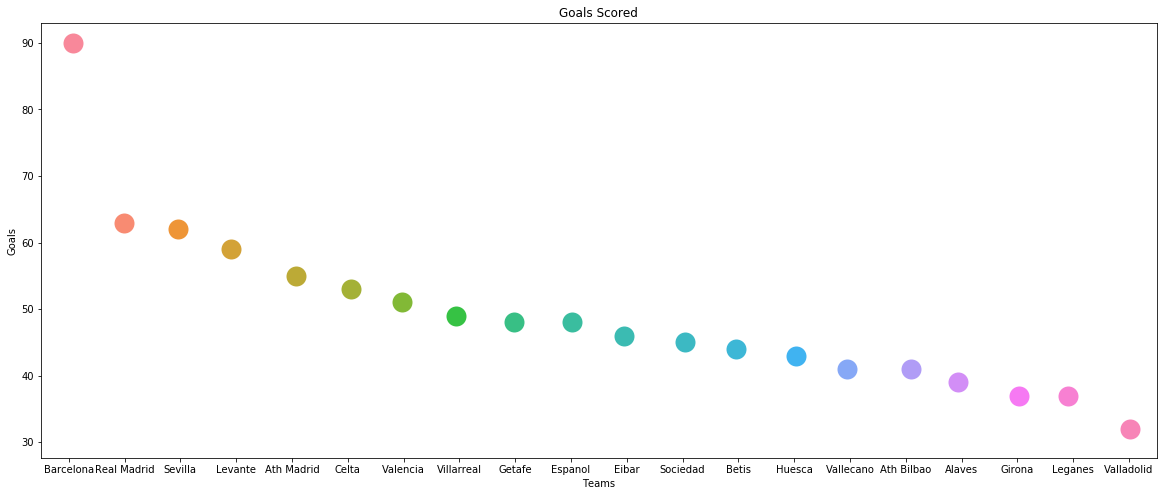

In [16]:
plt.figure(figsize=(20,8))
x = goals_forward.keys()
y = goals_forward.values()
X = []
Y = []
for name in x:
    X.append(name)
for val in y:
    Y.append(val)
ax = sns.stripplot(X,Y,size = 20)
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Goals Scored')
plt.show()

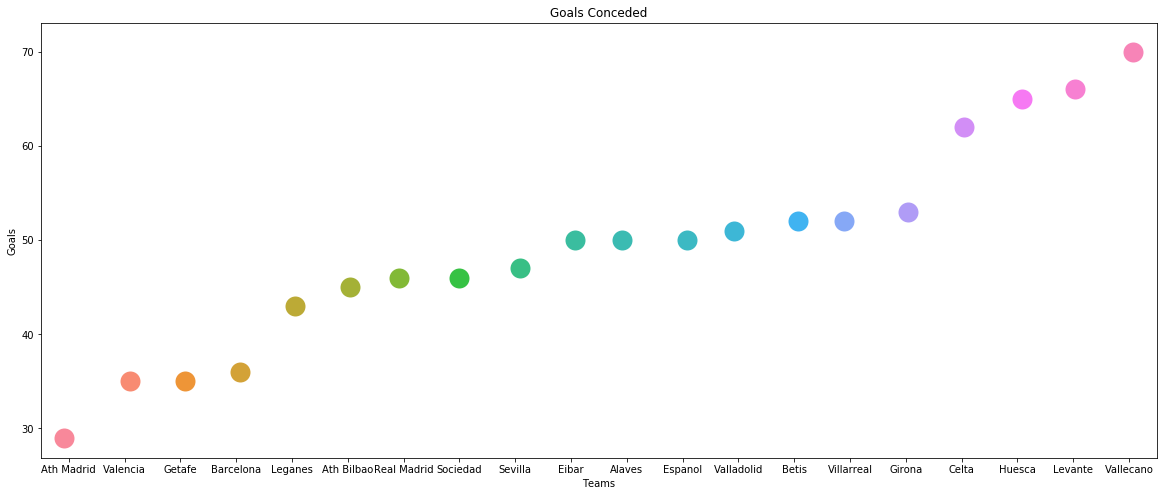

In [17]:
plt.figure(figsize=(20,8))
x = goals_against.keys()
y = goals_against.values()
X = []
Y = []
for name in x:
    X.append(name)
for val in y:
    Y.append(val)
ax = sns.stripplot(X,Y,size=20)
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Goals Conceded')
plt.show()

In [18]:
## Working on player stats for the season:
players_data = pd.read_csv('./DataSets/laliga_player_stats_english.csv')

In [19]:
print(players_data.columns)

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

In [20]:
## Comparing performance of Real Madrid and Barcelona mid fielders:
rm_mf = {}
bar_mf = {}
# idx:name
number_of_players = len(players_data.Team)
for i in range(number_of_players):
    if players_data.Team[i]=='Real Madrid' and players_data.Position[i] == 'Midfielder' and players_data['Games played'][i]>23:
        rm_mf[i] = players_data.Name[i]
    elif players_data.Team[i]=='FC Barcelona' and players_data.Position[i] == 'Midfielder' and players_data['Games played'][i]>23:
        bar_mf[i] = players_data.Name[i]
print(rm_mf)
print(bar_mf)
## Here we have 5 midfielders with most games played..

{381: 'Kroos', 382: 'Modrić', 383: 'Casemiro', 386: 'Asensio', 388: 'Isco'}
{130: 'I. Rakitić', 131: 'Sergio', 132: 'Coutinho', 133: 'Arthur', 136: 'Vidal'}


In [21]:
players_data.rename(columns={'Percentage of games played':'percentage_of_games_played',
                            'Yellow Cards':'yellow_cards',
                            'Red Cards':'red_cards',
                            'Goals scored':'goals_scored',
                            'Successful tackles':'successful_tackles',
                            'Unssuccessful tackles':'unsuccessful_tackles',
                            'Successful duels':'successful_duels',
                            'Duels lost':'duels_lost',
                            'Successful aerial challenges':'successful_ariel_challanges',
                            'Unsuccessful aerial challenges':'unsuccessful_ariel_challanges',
                            'Fouls suffered':'fouls_suffered',
                            'Fouls committed':'fouls_committed',
                            'Penalties won':'pens_won',
                            'Penalties given away':'pens_given_away',
                            'Handballs committed':'hand_committed',
                            'Fouls committed per card':'fouls_per_card',
                            'Shots on target':'shots_on_target',
                            'Successful dribbles':'successful_dribbles',
                            'Unsuccessful dribbles':'unsuccessful_dribbles',
                            'Man-to-man duels':'1v1_duels',
                            'Aerial duels':'aerial_duels',
                            'Short passes':'short_passes',
                            'Long passes':'long_passes',
                            'Through balls':'through_balls',
                            'Goals scored per attempt':'goals_scored_per_attempt'},inplace=True)
players_data.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'percentage_of_games_played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'yellow_cards', 'red_cards',
       'Second Yellows', 'goals_scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'successful_tackles',
       'unsuccessful_tackles', 'Last man', 'successful_duels', 'duels_lost',
       'successful_ariel_challanges', 'unsuccessful_ariel_challanges',
       'Offsides', 'fouls_suffered', 'fouls_committed', 'pens_won',
       'pens_given_away', 'hand_committed', 'fouls_per_card', 'Shots',
       'shots_on_target', 'Assists', 'successful_dribbles',
       'unsuccessful_dribbles', 'Goals scored.1', 'From inside the area',
       'From outside the area

In [22]:
midfielder_attributes = ['Games started','yellow_cards','red_cards',
                        'goals_scored','Goals conceded while player on pitch','Tackles','Interceptions',
                        'Recoveries','Clearances','successful_tackles','unsuccessful_tackles','successful_duels',
                        'duels_lost','successful_ariel_challanges','unsuccessful_ariel_challanges',
                        'fouls_suffered', 'fouls_committed', 'pens_won','pens_given_away', 'hand_committed', 'fouls_per_card', 'Shots',
                        'shots_on_target', 'Assists', 'successful_dribbles','unsuccessful_dribbles',
                        'Crosses','1v1_duels', 'aerial_duels', 'short_passes', 'long_passes',
                        'through_balls','goals_scored_per_attempt']
print(len(midfielder_attributes))

33


In [23]:
## Designing a model for comparing midfielders over the season:
rm_gol_mf = []
rm_ast_mf = []
bar_gol_mf = []
bar_ast_mf = []
rm_names = []
bar_names = []
for i in rm_mf.keys():
    rm_gol_mf.append(players_data['goals_scored'][i])
    rm_ast_mf.append(players_data['Assists'][i])
    rm_names.append(players_data['Name'][i])
for i in bar_mf.keys():
    bar_gol_mf.append(players_data['goals_scored'][i])
    bar_ast_mf.append(players_data['Assists'][i])
    bar_names.append(players_data['Name'][i])

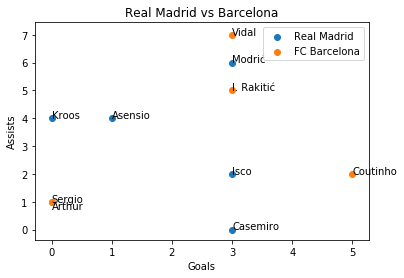

In [24]:
plt.scatter(rm_gol_mf,rm_ast_mf,label='Real Madrid')
for i, txt in enumerate(rm_names):
    plt.annotate(txt, (rm_gol_mf[i], rm_ast_mf[i]))
for i, txt in enumerate(bar_names):
    if txt=='Arthur':
        plt.annotate(txt, (bar_gol_mf[i], bar_ast_mf[i]-0.25))
    else:
        plt.annotate(txt, (bar_gol_mf[i], bar_ast_mf[i]))
plt.scatter(bar_gol_mf,bar_ast_mf,label='FC Barcelona')
plt.xlabel('Goals')
plt.ylabel('Assists')
plt.title('Real Madrid vs Barcelona')
plt.legend()
plt.show()

## Ratings Model for midfielders:

In [25]:
midf_teams = {}
for idx in range(len(players_data['Name'])):
    if players_data['Position'][idx]=='Midfielder':
        midf_teams[idx]=(players_data['Team'][idx],players_data['Name'][idx])
print(len(midf_teams))

220


In [26]:
## Collecting relevant stats for rating a midfielder:
midfielder_attributes = ['Games started','yellow_cards','red_cards',
                        'goals_scored','Goals conceded while player on pitch','Tackles','Interceptions',
                        'Recoveries','Clearances','successful_tackles','unsuccessful_tackles','successful_duels',
                        'duels_lost','successful_ariel_challanges','unsuccessful_ariel_challanges',
                        'fouls_suffered', 'fouls_committed', 'pens_won','pens_given_away', 'hand_committed', 'fouls_per_card', 'Shots',
                        'shots_on_target', 'Assists', 'successful_dribbles','unsuccessful_dribbles',
                        'Crosses','1v1_duels', 'aerial_duels', 'short_passes', 'long_passes',
                        'through_balls','goals_scored_per_attempt']
print(len(midfielder_attributes))

33


In [27]:
rel_stats = players_data.iloc[list(midf_teams.keys())]
rel_stats = rel_stats[midfielder_attributes]
print(len(rel_stats))
rel_stats

220


,Games started,yellow_cards,red_cards,goals_scored,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,successful_tackles,...,Assists,successful_dribbles,unsuccessful_dribbles,Crosses,1v1_duels,aerial_duels,short_passes,long_passes,through_balls,goals_scored_per_attempt
11,4,2,1,2,11,6,10,26,18,8,...,0,2,1,0,24,27,253.000,23,0,2
12,25,8,0,1,28,1,24,178,10,24,...,2,9,6,50,170,38,1.013,151,2,1
13,1,1,0,0,4,0,6,8,2,2,...,0,0,1,0,6,7,77.000,3,0,0
14,15,4,0,0,17,0,17,96,8,23,...,5,32,31,44,194,42,376.000,28,2,0
15,15,2,1,1,18,1,12,70,4,10,...,2,16,21,69,117,22,503.000,21,0,1
16,29,13,0,0,27,8,48,188,47,34,...,0,3,1,5,177,91,1.201,195,0,0
17,3,0,0,0,1,2,2,19,3,2,...,0,0,2,4,26,14,87.000,7,0,0
18,28,4,2,1,32,4,27,118,47,32,...,2,10,16,78,181,71,934.000,94,0,1
19,23,0,0,3,21,1,10,127,22,11,...,4,19,23,88,125,28,631.000,82,4,1
20,17,9,0,0,19,2,30,78,38,27,...,0,20,26,50,178,48,591.000,95,0,0


In [28]:
rel_stats_per_ninety = rel_stats/38
rel_stats_per_ninety

,Games started,yellow_cards,red_cards,goals_scored,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,successful_tackles,...,Assists,successful_dribbles,unsuccessful_dribbles,Crosses,1v1_duels,aerial_duels,short_passes,long_passes,through_balls,goals_scored_per_attempt
11,0.105263,0.052632,0.026316,0.052632,0.289474,0.157895,0.263158,0.684211,0.473684,0.210526,...,0.000000,0.052632,0.026316,0.000000,0.631579,0.710526,6.657895,0.605263,0.000000,0.052632
12,0.657895,0.210526,0.000000,0.026316,0.736842,0.026316,0.631579,4.684211,0.263158,0.631579,...,0.052632,0.236842,0.157895,1.315789,4.473684,1.000000,0.026658,3.973684,0.052632,0.026316
13,0.026316,0.026316,0.000000,0.000000,0.105263,0.000000,0.157895,0.210526,0.052632,0.052632,...,0.000000,0.000000,0.026316,0.000000,0.157895,0.184211,2.026316,0.078947,0.000000,0.000000
14,0.394737,0.105263,0.000000,0.000000,0.447368,0.000000,0.447368,2.526316,0.210526,0.605263,...,0.131579,0.842105,0.815789,1.157895,5.105263,1.105263,9.894737,0.736842,0.052632,0.000000
15,0.394737,0.052632,0.026316,0.026316,0.473684,0.026316,0.315789,1.842105,0.105263,0.263158,...,0.052632,0.421053,0.552632,1.815789,3.078947,0.578947,13.236842,0.552632,0.000000,0.026316
16,0.763158,0.342105,0.000000,0.000000,0.710526,0.210526,1.263158,4.947368,1.236842,0.894737,...,0.000000,0.078947,0.026316,0.131579,4.657895,2.394737,0.031605,5.131579,0.000000,0.000000
17,0.078947,0.000000,0.000000,0.000000,0.026316,0.052632,0.052632,0.500000,0.078947,0.052632,...,0.000000,0.000000,0.052632,0.105263,0.684211,0.368421,2.289474,0.184211,0.000000,0.000000
18,0.736842,0.105263,0.052632,0.026316,0.842105,0.105263,0.710526,3.105263,1.236842,0.842105,...,0.052632,0.263158,0.421053,2.052632,4.763158,1.868421,24.578947,2.473684,0.000000,0.026316
19,0.605263,0.000000,0.000000,0.078947,0.552632,0.026316,0.263158,3.342105,0.578947,0.289474,...,0.105263,0.500000,0.605263,2.315789,3.289474,0.736842,16.605263,2.157895,0.105263,0.026316
20,0.447368,0.236842,0.000000,0.000000,0.500000,0.052632,0.789474,2.052632,1.000000,0.710526,...,0.000000,0.526316,0.684211,1.315789,4.684211,1.263158,15.552632,2.500000,0.000000,0.000000


In [29]:
points_by_player = {}
for idx in midf_teams.keys():
    (team,name) = midf_teams[idx]
    points_by_player[idx] = points_table[team]
points_by_player

{11: 53,
 12: 53,
 13: 53,
 14: 53,
 15: 53,
 16: 53,
 17: 53,
 18: 53,
 19: 53,
 20: 53,
 21: 53,
 22: 53,
 23: 53,
 43: 76,
 44: 76,
 45: 76,
 46: 76,
 47: 76,
 48: 76,
 49: 76,
 50: 76,
 51: 76,
 52: 76,
 53: 76,
 75: 45,
 76: 45,
 77: 45,
 78: 45,
 79: 45,
 80: 45,
 81: 45,
 82: 45,
 83: 45,
 101: 50,
 102: 50,
 103: 50,
 104: 50,
 105: 50,
 106: 50,
 107: 50,
 108: 50,
 109: 50,
 130: 87,
 131: 87,
 132: 87,
 133: 87,
 134: 87,
 135: 87,
 136: 87,
 154: 59,
 155: 59,
 156: 59,
 157: 59,
 158: 59,
 159: 59,
 160: 59,
 161: 59,
 162: 59,
 179: 37,
 180: 37,
 181: 37,
 182: 37,
 183: 37,
 184: 37,
 185: 37,
 186: 37,
 187: 37,
 188: 37,
 189: 37,
 190: 37,
 208: 44,
 209: 44,
 210: 44,
 211: 44,
 212: 44,
 213: 44,
 214: 44,
 215: 44,
 216: 44,
 233: 41,
 234: 41,
 235: 41,
 236: 41,
 237: 41,
 238: 41,
 239: 41,
 240: 41,
 241: 41,
 242: 41,
 243: 41,
 244: 41,
 245: 41,
 246: 41,
 265: 32,
 266: 32,
 267: 32,
 268: 32,
 269: 32,
 270: 32,
 271: 32,
 272: 32,
 273: 32,
 274: 32,
 27

In [30]:
count = 0
for idx in points_by_player.keys():
    if points_by_player[idx]==10:
        break
    count += 1
print(count)

220


In [31]:
## Now scaling the maximum points of the season to 10:
for idx in points_by_player.keys():
    points_by_player[idx] = points_by_player[idx]/8.7
points_by_player
## These are analogous to average rating throughout the season...

{11: 6.0919540229885065,
 12: 6.0919540229885065,
 13: 6.0919540229885065,
 14: 6.0919540229885065,
 15: 6.0919540229885065,
 16: 6.0919540229885065,
 17: 6.0919540229885065,
 18: 6.0919540229885065,
 19: 6.0919540229885065,
 20: 6.0919540229885065,
 21: 6.0919540229885065,
 22: 6.0919540229885065,
 23: 6.0919540229885065,
 43: 8.735632183908047,
 44: 8.735632183908047,
 45: 8.735632183908047,
 46: 8.735632183908047,
 47: 8.735632183908047,
 48: 8.735632183908047,
 49: 8.735632183908047,
 50: 8.735632183908047,
 51: 8.735632183908047,
 52: 8.735632183908047,
 53: 8.735632183908047,
 75: 5.172413793103448,
 76: 5.172413793103448,
 77: 5.172413793103448,
 78: 5.172413793103448,
 79: 5.172413793103448,
 80: 5.172413793103448,
 81: 5.172413793103448,
 82: 5.172413793103448,
 83: 5.172413793103448,
 101: 5.74712643678161,
 102: 5.74712643678161,
 103: 5.74712643678161,
 104: 5.74712643678161,
 105: 5.74712643678161,
 106: 5.74712643678161,
 107: 5.74712643678161,
 108: 5.74712643678161,
 10

In [32]:
dataset_mf = np.array(rel_stats_per_ninety)
print(dataset_mf.shape)

(220, 33)


In [33]:
y_vals = np.array(list(points_by_player.values()))
y_vals.shape

(220,)

In [34]:
## Now comes the model:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [35]:
import tensorflow as tf

In [122]:
from keras import backend as K

In [212]:
def output_of_lambda(x):
    return (None,1)

def custom_function(inpu):
    W = np.array([0,1,2,3,4,5,6,7,8,9,10],dtype='float32')
    ans = (inpu*W)
    ans = K.sum(ans)
    return ans

In [213]:
############ Testing cell...............
tf.compat.v1.disable_eager_execution()
weights = tf.constant([0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])
xi = tf.compat.v1.placeholder(tf.float32,[11,])
ans = xi*weights
print(type(ans))
with tf.compat.v1.Session() as sess:
    act = sess.run(ans,{xi:[0,1,2,3,4,5,6,7,8,9,10]})
print(act)
print(ans.get_shape().as_list())
ans = tf.reshape(ans,[1,11])
print(ans.get_shape().as_list())

<class 'tensorflow.python.framework.ops.Tensor'>
[  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
[11]
[1, 11]


In [305]:
midfield_model = Sequential()
midfield_model.add(Dense(8,input_dim = 33, activation = 'relu'))
midfield_model.add(Dense(16,activation = 'relu'))
midfield_model.add(Dense(32,activation = 'relu'))
midfield_model.add(Dense(11,activation = 'softmax'))
midfield_model.add(Lambda(custom_function,output_shape=output_of_lambda))
## last second layer has 11 nodes for ratings 0,1,2....10
## last layer is the custom layer.

In [372]:
get_fourth_layer_op = K.function([midfield_model.layers[0].input],[midfield_model.layers[3].output])
output_vgot = get_fourth_layer_op([dataset_mf])
output_vgot = np.array(output_vgot)
print(output_vgot.shape)

(1, 220, 11)


In [373]:
get_fifth_layer = K.function([midfield_model.layers[0].input],[midfield_model.layers[4].output])
output_vgot = get_fifth_layer([dataset_mf])
output_vgot = np.array(output_vgot)
print(output_vgot.shape)

(1,)


In [306]:
midfield_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 8)                 272       
_________________________________________________________________
dense_45 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_47 (Dense)             (None, 11)                363       
_________________________________________________________________
lambda_26 (Lambda)           (None, 1)                 0         
Total params: 1,323
Trainable params: 1,323
Non-trainable params: 0
_________________________________________________________________


In [307]:
midfield_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [348]:
history = midfield_model.fit(dataset_mf,y_vals,epochs = 750,batch_size=250,validation_split=0)

Epoch 1/750
220/220 [==============================] - 0s 18us/step - loss: 2.1663 - mse: 2.1663 - mae: 1.1270
Epoch 2/750
220/220 [==============================] - 0s 0us/step - loss: 2.1662 - mse: 2.1662 - mae: 1.1269
Epoch 3/750
220/220 [==============================] - 0s 0us/step - loss: 2.1662 - mse: 2.1662 - mae: 1.1268
Epoch 4/750
220/220 [==============================] - 0s 18us/step - loss: 2.1661 - mse: 2.1661 - mae: 1.1267
Epoch 5/750
220/220 [==============================] - 0s 18us/step - loss: 2.1660 - mse: 2.1660 - mae: 1.1266
Epoch 6/750
220/220 [==============================] - 0s 0us/step - loss: 2.1660 - mse: 2.1660 - mae: 1.1265
Epoch 7/750
220/220 [==============================] - 0s 0us/step - loss: 2.1659 - mse: 2.1659 - mae: 1.1264
Epoch 8/750
220/220 [==============================] - 0s 18us/step - loss: 2.1659 - mse: 2.1659 - mae: 1.1263
Epoch 9/750
220/220 [==============================] - 0s 18us/step - loss: 2.1658 - mse: 2.1658 - mae: 1.1262
Epoch

Epoch 75/750
220/220 [==============================] - 0s 18us/step - loss: 2.1629 - mse: 2.1629 - mae: 1.1208
Epoch 76/750
220/220 [==============================] - 0s 18us/step - loss: 2.1628 - mse: 2.1628 - mae: 1.1208
Epoch 77/750
220/220 [==============================] - 0s 18us/step - loss: 2.1628 - mse: 2.1628 - mae: 1.1207
Epoch 78/750
220/220 [==============================] - 0s 0us/step - loss: 2.1628 - mse: 2.1628 - mae: 1.1206
Epoch 79/750
220/220 [==============================] - 0s 0us/step - loss: 2.1627 - mse: 2.1627 - mae: 1.1206
Epoch 80/750
220/220 [==============================] - 0s 18us/step - loss: 2.1627 - mse: 2.1627 - mae: 1.1205
Epoch 81/750
220/220 [==============================] - 0s 18us/step - loss: 2.1627 - mse: 2.1627 - mae: 1.1204
Epoch 82/750
220/220 [==============================] - 0s 0us/step - loss: 2.1626 - mse: 2.1626 - mae: 1.1204
Epoch 83/750
220/220 [==============================] - 0s 18us/step - loss: 2.1626 - mse: 2.1626 - mae: 1.

Epoch 148/750
220/220 [==============================] - 0s 0us/step - loss: 2.1610 - mse: 2.1610 - mae: 1.1163
Epoch 149/750
220/220 [==============================] - 0s 0us/step - loss: 2.1610 - mse: 2.1610 - mae: 1.1163
Epoch 150/750
220/220 [==============================] - 0s 0us/step - loss: 2.1610 - mse: 2.1610 - mae: 1.1162
Epoch 151/750
220/220 [==============================] - 0s 0us/step - loss: 2.1610 - mse: 2.1610 - mae: 1.1161
Epoch 152/750
220/220 [==============================] - 0s 0us/step - loss: 2.1610 - mse: 2.1610 - mae: 1.1161
Epoch 153/750
220/220 [==============================] - 0s 18us/step - loss: 2.1609 - mse: 2.1609 - mae: 1.1160
Epoch 154/750
220/220 [==============================] - 0s 18us/step - loss: 2.1609 - mse: 2.1609 - mae: 1.1160
Epoch 155/750
220/220 [==============================] - 0s 18us/step - loss: 2.1609 - mse: 2.1609 - mae: 1.1159
Epoch 156/750
220/220 [==============================] - 0s 0us/step - loss: 2.1609 - mse: 2.1609 - m

Epoch 221/750
220/220 [==============================] - 0s 0us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1129
Epoch 222/750
220/220 [==============================] - 0s 0us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1129
Epoch 223/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1128
Epoch 224/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1128
Epoch 225/750
220/220 [==============================] - 0s 0us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1128
Epoch 226/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1127
Epoch 227/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1127
Epoch 228/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 - mae: 1.1127
Epoch 229/750
220/220 [==============================] - 0s 18us/step - loss: 2.1600 - mse: 2.1600 

Epoch 294/750
220/220 [==============================] - 0s 18us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1104
Epoch 295/750
220/220 [==============================] - 0s 18us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1104
Epoch 296/750
220/220 [==============================] - 0s 18us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1104
Epoch 297/750
220/220 [==============================] - 0s 0us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1103
Epoch 298/750
220/220 [==============================] - 0s 0us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1103
Epoch 299/750
220/220 [==============================] - 0s 18us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1103
Epoch 300/750
220/220 [==============================] - 0s 0us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1103
Epoch 301/750
220/220 [==============================] - 0s 0us/step - loss: 2.1595 - mse: 2.1595 - mae: 1.1102
Epoch 302/750
220/220 [==============================] - 0s 18us/step - loss: 2.1595 - mse: 2.1595 -

Epoch 367/750
220/220 [==============================] - 0s 0us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1086
Epoch 368/750
220/220 [==============================] - 0s 0us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1086
Epoch 369/750
220/220 [==============================] - 0s 18us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1086
Epoch 370/750
220/220 [==============================] - 0s 20us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1086
Epoch 371/750
220/220 [==============================] - 0s 18us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1085
Epoch 372/750
220/220 [==============================] - 0s 21us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1085
Epoch 373/750
220/220 [==============================] - 0s 18us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1085
Epoch 374/750
220/220 [==============================] - 0s 18us/step - loss: 2.1593 - mse: 2.1593 - mae: 1.1085
Epoch 375/750
220/220 [==============================] - 0s 18us/step - loss: 2.1593 - mse: 2.1593

Epoch 440/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 441/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 442/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 443/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 444/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 445/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1073
Epoch 446/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1072
Epoch 447/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1072
Epoch 448/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 

Epoch 513/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 514/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 515/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 516/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 517/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 518/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1064
Epoch 519/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1063
Epoch 520/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1063
Epoch 521/750
220/220 [==============================] - 0s 24us/step - loss: 2.1591 - mse: 2.1591

Epoch 586/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1058
Epoch 587/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1058
Epoch 588/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1058
Epoch 589/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1057
Epoch 590/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1057
Epoch 591/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1057
Epoch 592/750
220/220 [==============================] - 0s 18us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1057
Epoch 593/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 - mae: 1.1057
Epoch 594/750
220/220 [==============================] - 0s 0us/step - loss: 2.1591 - mse: 2.1591 

Epoch 659/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 660/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 661/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 662/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 663/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 664/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 665/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 666/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1053
Epoch 667/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 

Epoch 732/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1051
Epoch 733/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 734/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 735/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 736/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 737/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 738/750
220/220 [==============================] - 0s 0us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 739/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 - mae: 1.1050
Epoch 740/750
220/220 [==============================] - 0s 18us/step - loss: 2.1590 - mse: 2.1590 

In [350]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae'])

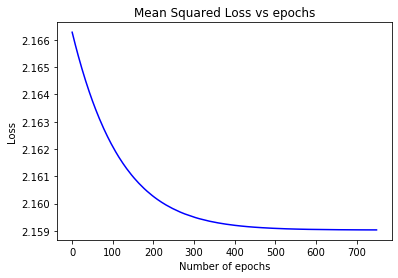

In [351]:
loss = history.history['mse']
plt.plot(loss,'b')
plt.title('Mean Squared Loss vs epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

In [352]:
dataset_mf[0].shape

(33,)

In [374]:
prediction = midfield_model.predict(dataset_mf[1:2])

In [375]:
print(prediction.shape)
print(prediction)

(1,)
[2.3148075e-06]


In [332]:
name_mf = []
club_mf = []
for (Club,Name) in list(midf_teams.values()):
    name_mf.append(Name)
    club_mf.append(Club)
print(name_mf[:10])

['Nolaskoain', 'Beñat', 'Iturraspe', 'Córdoba', 'Susaeta', 'Dani García', 'Mikel Rico', 'De Marcos', 'Ibai', 'Capa']


In [333]:
## Predicted ratings of Midfielders of Laliga 2019/19:
count = 0
for i in range(len(name_mf)):
    count+=1
    print(name_mf[i]+' : '+str(predictions_all[i]))
print(count)

Nolaskoain : 1.0466617
Beñat : 1.0466617
Iturraspe : 1.0466617
Córdoba : 1.0466617
Susaeta : 1.0466617
Dani García : 1.0466617
Mikel Rico : 1.0466617
De Marcos : 1.0466617
Ibai : 1.0466617
Capa : 1.0466617
Raúl García : 1.0466617
Unai López : 1.0466617
Iñigo Vicente : 1.0466617
Thomas : 1.0466617
Koke : 1.0466617
Saúl : 1.0466617
Rodrigo : 1.0466617
Cristian Rodríguez : 1.0466617
Mikel Carro : 1.0466617
Borja Garcés : 1.0466617
Victor Mollejo : 1.0466617
Joaquín Muñoz : 1.0466617
Sergio Camello : 1.0466617
Gustavo Assunção : 1.0466617
Óscar : 1.0466617
Gumbau : 1.0466617
Recio : 1.0466617
El Zhar : 1.0466617
Szymanowski : 1.0466617
Eraso : 1.0466617
Rubén Pérez J. : 1.0466617
Vesga : 1.0466617
Javier Avilés : 0.79235965
Álex Blanco : 0.79235965
T. Pina : 0.79235965
Inui : 0.79235965
Manu : 0.79235965
Darko : 0.79235965
M. Wakaso : 0.79235965
Jony : 0.79235965
Paulino De la Fuente : 0.79235965
Andrei Lupu : 0.79235965
I. Rakitić : 0.79235965
Sergio : 0.79235965
Coutinho : 0.79235965
Art

In [334]:
## Calculating mse loss:
np.mean((predictions_all-y_vals)**2)

26.456557025598187